In [ ]:
#### Downloading Kaggle dataset to cloud

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.70 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/4117/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1576595191&Signature=crWy2TEx8Crx9lCqHW5A4q0PaB1VJ0oaeX%2FlUxx09h0g%2FSBif1UuvR%2FDCkhqMpajh0JCwJOhyrnxZPbNd%2FSUQPnYrts3Y6S9Ys6c5r08ARuOQJyQXYQC1hNaVllvXXPR3HusT6fOCMlrWe2Sq%2FLRZw1wZXnztRB53DlqV7EigZnqDQM5EHaOYMivob0RpbJuk7LfUJOpT0DqAzQSt2eaXCYu7O6dISvKitglE6NGNBaUS0UowTonpzhRmvUtSYPhXDjGPDkNdlvIE2r5EeUFFg0KrZUZmYLglSrUDFIfRA5hcBEXwwk1c55GAzQ61T8TIeX99OMTHpEmRaj6eO1qAA%3D%3D" -O "train.7z" -c

--2019-12-14 15:53:48--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/4117/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1576595191&Signature=crWy2TEx8Crx9lCqHW5A4q0PaB1VJ0oaeX%2FlUxx09h0g%2FSBif1UuvR%2FDCkhqMpajh0JCwJOhyrnxZPbNd%2FSUQPnYrts3Y6S9Ys6c5r08ARuOQJyQXYQC1hNaVllvXXPR3HusT6fOCMlrWe2Sq%2FLRZw1wZXnztRB53DlqV7EigZnqDQM5EHaOYMivob0RpbJuk7LfUJOpT0DqAzQSt2eaXCYu7O6dISvKitglE6NGNBaUS0UowTonpzhRmvUtSYPhXDjGPDkNdlvIE2r5EeUFFg0KrZUZmYLglSrUDFIfRA5hcBEXwwk1c55GAzQ61T8TIeX99OMTHpEmRaj6eO1qAA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.166.176, 2404:6800:4009:80a::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.166.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18810691091 (18G) [application/x-7z-compressed]
Saving to: ‘train.7z’

train.7z            100%[===================>]  17.52G  25.2MB/s    in 11m 47s 

2019-12-14 16:05:35 (25.4 MB/s) - ‘train.

After download above zip file. Unzip it using terminal.


sudo apt-get install p7zip-full (first install 7z format)

7za x train.7z (unzip command)

In [11]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
from multiprocessing import Pool
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from joblib import dump,load

from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer
import scipy
import scipy.sparse as sp
from sklearn.preprocessing import normalize

In [2]:
source = "/home/pranay/asmFiles/"
destination = "/home/pranay/byteFiles"

data_files = os.listdir(source)
for file in data_files:
    if (file.endswith("bytes")):
        shutil.move(file,destination)

<IPython.core.display.Javascript object>


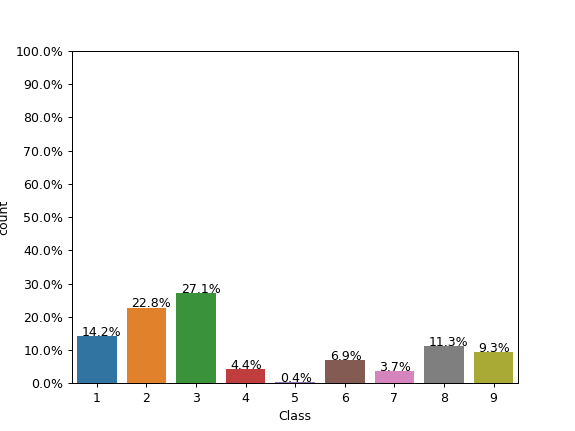

In [5]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [6]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

   Class                    ID      size
0      6  gyZztfseanvGp5uX2qix  0.468750
1      2  HSpxv7XiuwNj2ceELTnJ  6.140625
2      2  64FZCyUcjXxLNv1K8Bm3  3.506824
3      3  H7k4tXfrKFIZN1GqnYUw  6.703125
4      1  AjhW6ifgDC38ObQcJPa5  0.597656


### Adding Bi-grams on Bytes Feature

In [2]:

byte_feature_string = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??" 
split_bytes = byte_feature_string.split(",")

final_Bigram = []
for i in range(len(split_bytes)):
    for j in range(len(split_bytes)):
        f = split_bytes[i] +" "+ split_bytes[j]
        final_Bigram.append(f)


In [3]:

final_Trigram = []

for i in range(len(split_bytes)):
    for j in range(len(split_bytes)):
        for k in range(len(split_bytes)):
            f = split_bytes[i] +" "+ split_bytes[j] + " " + split_bytes[k]
            final_Trigram.append(f)


In [10]:
# code reference : https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb

# TRAINING
# Now divide the train files into four groups for multiprocessing
# tempDir = '/home/pranay/tempDir/'
# tfiles = os.listdir(tempDir)

ext_drive = '/home/pranay/byteFiles/'
tfiles = os.listdir(ext_drive)
hext_ = int(len(tfiles)/16)

print("quart : ",hext_)
train1 = tfiles[:hext_]
train2 = tfiles[hext_:(2*hext_)]
train3 = tfiles[(2*hext_):(3*hext_)]
train4 = tfiles[(3*hext_):4*hext_]
train5 = tfiles[(4*hext_):5*hext_]
train6 = tfiles[(5*hext_):6*hext_]
train7 = tfiles[(6*hext_):7*hext_]
train8 = tfiles[(7*hext_):8*hext_]
train9 = tfiles[(8*hext_):9*hext_]
train10 = tfiles[(9*hext_):10*hext_]
train11 = tfiles[(10*hext_):11*hext_]
train12 = tfiles[(11*hext_):12*hext_]
train13 = tfiles[(12*hext_):13*hext_]
train14 = tfiles[(13*hext_):14*hext_]
train15 = tfiles[(14*hext_):15*hext_]
train16 = tfiles[(15*hext_):]

print (len(tfiles), hext_, (len(train1)+len(train2)+len(train3)+len(train4)+len(train5)+len(train6)+len(train7)+len(train8)+len(train9)+len(train10)+len(train11)+len(train12)+len(train13)+len(train14)+len(train15) +len(train16)  ))
trains = [train1, train2, train3, train4, train5, train6, train7, train8, train9, train10, train11, train12,train13, train14, train15, train16]
# p = Pool(16)
# bigram_chunks = p.map(extract_byte_features_bigrams, trains)

quart :  679
10868 679 10868


In [26]:
for i in range(0,16):
    folderName= 'folder'+str(i)
    if not os.path.isdir(folderName):
        os.makedirs('/home/pranay/bytesChunksFiles/'+folderName)

In [29]:
source = '/home/pranay/byteFiles/'
count = 0
for tr in trains:
    
    dest = '/home/pranay/bytesChunksFiles/folder'+str(count)
    for f in tr:
        shutil.copy(source+f,dest)
    count += 1        

In [33]:
bytesChunksFiles = os.listdir('/home/pranay/bytesChunksFiles/')

for dirs in bytesChunksFiles:
    DIR = '/home/pranay/bytesChunksFiles/'+dirs
    print("Number of files in ",dirs+'  ==> ', len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])) 


Number of files in  folder6  ==>  679
Number of files in  folder2  ==>  679
Number of files in  folder15  ==>  683
Number of files in  folder8  ==>  679
Number of files in  folder14  ==>  679
Number of files in  folder3  ==>  679
Number of files in  folder5  ==>  679
Number of files in  folder7  ==>  679
Number of files in  folder1  ==>  679
Number of files in  folder9  ==>  679
Number of files in  folder13  ==>  679
Number of files in  folder0  ==>  679
Number of files in  folder12  ==>  679
Number of files in  folder4  ==>  679
Number of files in  folder11  ==>  679
Number of files in  folder10  ==>  679


In [8]:
#https://stackoverflow.com/a/8980156
def commonProcess(targetFolder): 
    bow = CountVectorizer(ngram_range=(2, 2), vocabulary = bigram)
    total_byte_files = 10868
    
    source = '/home/pranay/bytesChunksFiles/'+targetFolder

    files_len = os.listdir(source)
    len_files=len(files_len)
    bigram_Matrix = scipy.sparse.csr_matrix((len_files, len(bigram)))
 
    i = 0
    for index, file in tqdm(enumerate(os.listdir(source))):
        
        f = open('./byteFiles/' + file)
        k = bow.fit_transform([f.read().replace('\n', ' ')])
        bigram_Matrix[index] = scipy.sparse.csr_matrix(k)
        f.close()
    scipy.sparse.save_npz('/home/pranay/bytesChunksFiles/npz/'+targetFolder+'.npz', bigram_Matrix)
    
    

In [15]:
%%time

def main():

    manager=multiprocessing.Manager() 	
    p1=Process(target=commonProcess('folder0'))
    p2=Process(target=commonProcess('folder1'))
    p3=Process(target=commonProcess('folder2'))
    p4=Process(target=commonProcess('folder3'))
    p5=Process(target=commonProcess('folder4'))
    p6=Process(target=commonProcess('folder5'))
    p7=Process(target=commonProcess('folder6'))
    p8=Process(target=commonProcess('folder7'))
    p9=Process(target=commonProcess('folder8'))
    p10=Process(target=commonProcess('folder9'))
    p11=Process(target=commonProcess('folder10'))
    p12=Process(target=commonProcess('folder11'))
    p13=Process(target=commonProcess('folder12'))
    p14=Process(target=commonProcess('folder13'))
    p15=Process(target=commonProcess('folder14'))
    p16=Process(target=commonProcess('folder15'))


    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()
    p9.start()
    p10.start()
    p11.start()
    p12.start()
    p13.start()
    p14.start()
    p15.start()
    p16.start()

    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()
    p8.join()
    p9.join()
    p10.join()
    p11.join()
    p12.join()
    p13.join()
    p14.join()
    p15.join()
    p16.join()

if __name__=="__main__":
    main()

679it [12:55,  1.14s/it]
679it [13:19,  1.18s/it]
683it [13:04,  1.15s/it]


CPU times: user 37min 33s, sys: 2min 43s, total: 40min 16s
Wall time: 40min 41s


In [22]:
byte_fea1=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder0.npz")
byte_fea2=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder1.npz")
byte_fea3=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder2.npz")
byte_fea4=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder3.npz")
byte_fea5=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder4.npz")
byte_fea6=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder5.npz")
byte_fea7=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder6.npz")
byte_fea8=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder7.npz")
byte_fea9=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder8.npz")
byte_fea10=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder9.npz")
byte_fea11=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder10.npz")
byte_fea12=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder11.npz")
byte_fea13=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder12.npz")
byte_fea14=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder13.npz")
byte_fea15=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder14.npz")
byte_fea16=scipy.sparse.load_npz("/home/pranay/bytesChunksFiles/npz/folder15.npz")

In [27]:
from scipy.sparse import vstack
final_byte_feature=vstack((byte_fea1,byte_fea2,byte_fea3,byte_fea4,byte_fea5, byte_fea6, byte_fea7, byte_fea8, byte_fea9, byte_fea10, byte_fea11, byte_fea12, byte_fea13, byte_fea14, byte_fea15, byte_fea16))

In [4]:
print(final_Bigram[:3], final_Trigram[:3])

['00 00', '00 01', '00 02'] ['00 00 00', '00 00 01', '00 00 02']


In [31]:
def imp_features(data):
    rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    rf.fit(data, class_y)
    imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
    return imp_feature_indx

In [32]:
imp_byte_100=imp_features(final_byte_matrix)
byte_1000_matrix=final_byte_matrix[:,imp_byte_100[0:1000]]

In [33]:
scipy.sparse.save_npz('byte_1000_matrix.npz', byte_1000_matrix)

In [27]:
final_byte_feature.shape

(10868, 66049)

## Create ASM image Features

Firstly give full credit to below blog. Referred below blog.
- https://towardsdatascience.com/malware-classification-using-machine-learning-7c648fb1da79


In [2]:
import array
import imageio

In [5]:
## Convert to files to Image files

for asmfile in tqdm(os.listdir("/home/pranay/asmFiles")):
    
        asm_file_name = asmfile.split('.')[0]
        file = codecs.open("/home/pranay/asmFiles/" + asmfile, 'rb')
        asm_file_len = os.path.getsize("/home/pranay/asmFiles/" + asmfile)

        width = int(asm_file_len ** 0.5)
        rem = int(asm_file_len / width)

        imgarr = array.array('B')
        imgarr.frombytes(file.read())

        file.close()
        reshaped_img = np.reshape(imgarr[:width * width], (width, width))
        reshaped_img = np.uint8(reshaped_img)

        imageio.imwrite('/home/pranay/asm_image/' + asm_file_name + '.png',reshaped_img)

100%|██████████| 10868/10868 [3:39:34<00:00,  1.21s/it] 


## ASM Images Visualization

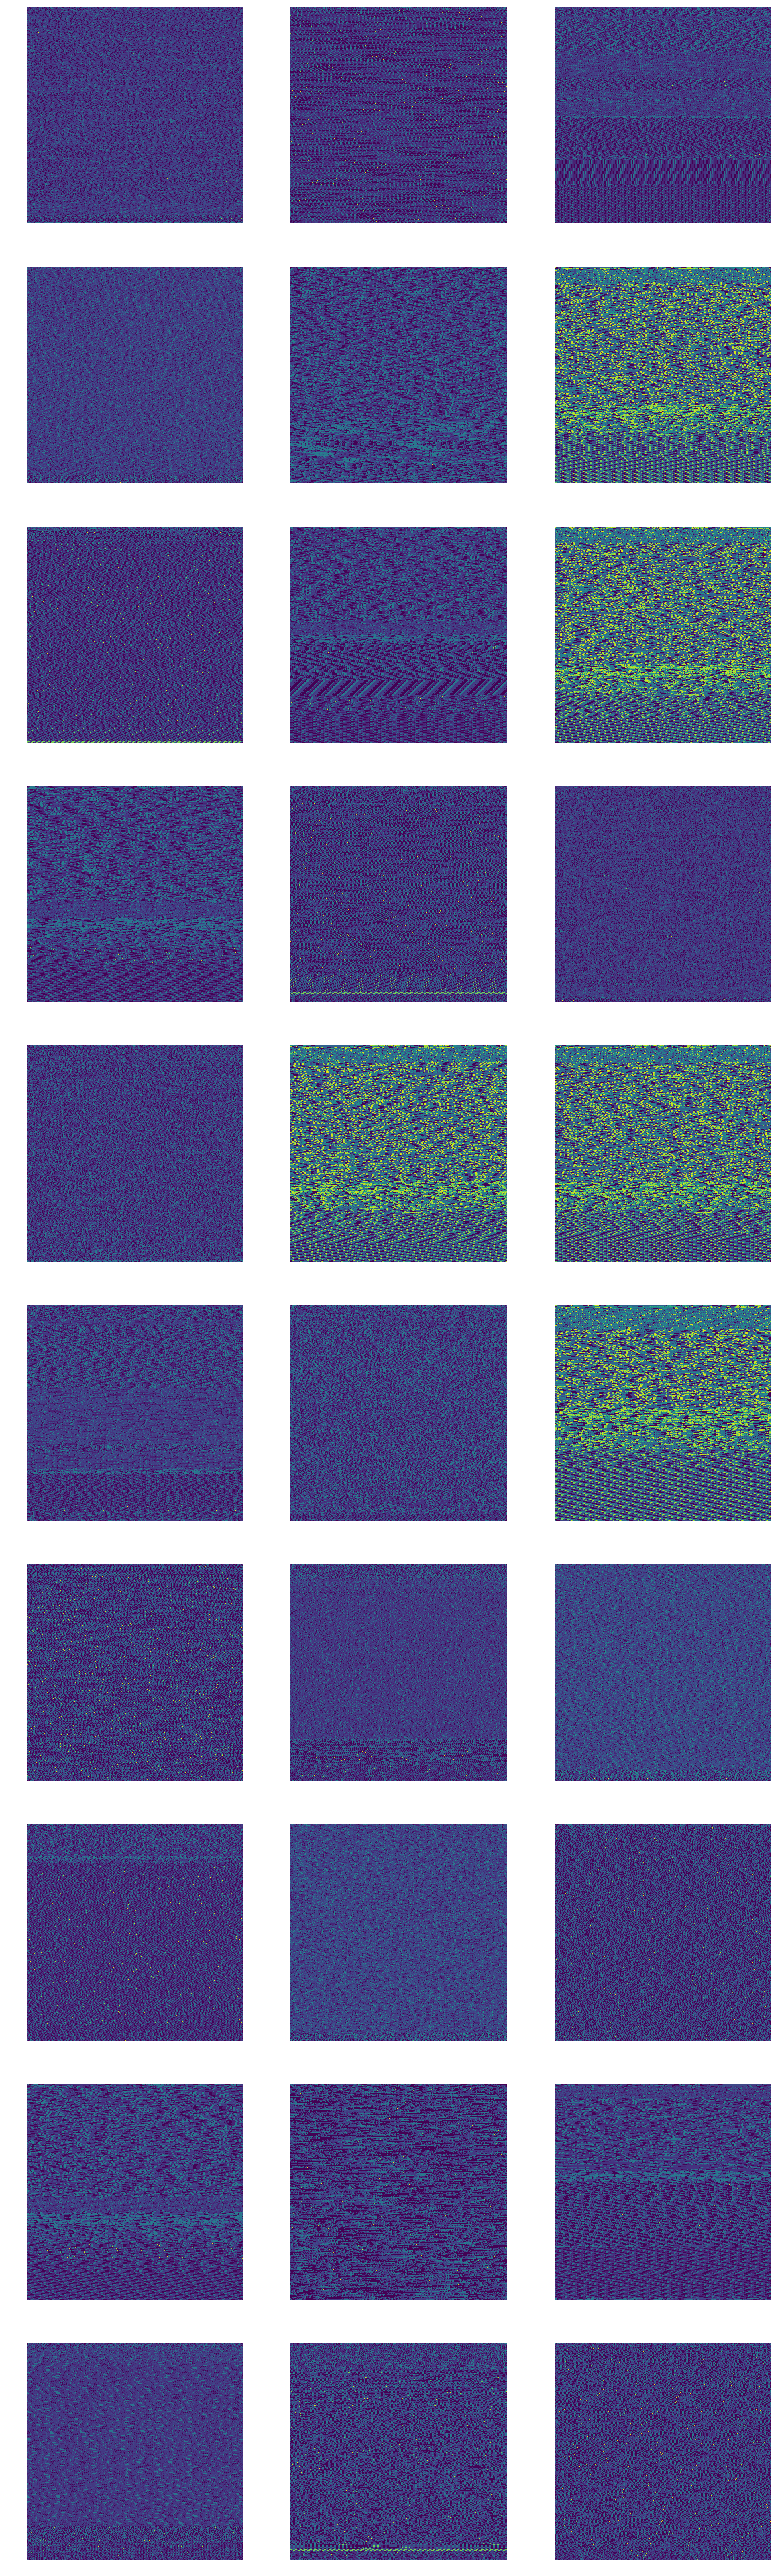

In [77]:
import PIL
%matplotlib inline

rows = 10
path= '/home/pranay/asm_image/'

os.chdir(path)
files=os.listdir(path)
files=files[:30]


plt.figure(figsize=(20,70))
for num, f in enumerate(files):
  try:
    img = PIL.Image.open(path+'/'+f)
    plt.subplot(rows,3,num+1)
    plt.axis('off')
    plt.imshow(img)

  except Exception as e:  # in the interest in keeping the output clean...
    print(e)
    pass


In [15]:
## No-Overfitting
Top_1000 = np.zeros((10868, 1000))
import cv2

In [16]:
Top_1000 = np.zeros((10868, 1000))

for i, asmfile in tqdm(enumerate(os.listdir("/home/pranay/asmFiles/"))):
    img = cv2.imread("/home/pranay/asm_image/" + asmfile.split('.')[0] + '.png') 
    img_arr = img.flatten()[:1000]
    Top_1000[i, :] += img_arr

10868it [27:15,  6.64it/s]


In [17]:
from sklearn.preprocessing import normalize
df_columns = []
for i in range(1000):
    df_columns.append('pix' + str(i))
    
image_asm_data = pd.DataFrame(normalize(Top_1000, axis = 0), columns = df_columns)
image_asm_data['ID'] = Y.Id
image_asm_data.head(2)

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0  0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
1  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   

       pix7      pix8      pix9  ...    pix991    pix992   pix993   pix994  \
0  0.012927  0.012927  0.013963  ...  0.006840  0.006840  0.00684  0.00684   
1  0.008320  0.008320  0.007913  ...  0.010259  0.010259  0.01026  0.01026   

    pix995    pix996    pix997    pix998    pix999                    ID  
0  0.00684  0.006838  0.006838  0.006838  0.019941  01azqd4InC7m9JpocGv5  
1  0.01026  0.010257  0.010257  0.010257  0.001447  01IsoiSMh5gxyDYTl4CB  

[2 rows x 1001 columns]

In [18]:
image_asm_data.to_pickle("image_features_1000")

In [19]:
result_x.to_pickle("result_x")

### Selecting top 1000 byte features

In [11]:
def imp_features(data):
    rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    rf.fit(data, result_y)
    imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
    return imp_feature_indx

In [28]:
imp_byte_100=imp_features(final_byte_matrix)
byte_1000_matrix=final_byte_matrix[:,imp_byte_100[0:1000]]

In [28]:
scipy.sparse.save_npz('byte_1000_matrix.npz', byte_1000_matrix)

In [29]:
byte_1000_matrix=scipy.sparse.load_npz("byte_1000_matrix.npz")

In [31]:
byte_500_matrix=scipy.sparse.load_npz("byte_500_matrix.npz")

### Adding Bi-grams on ASM Feature

In [6]:
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

In [12]:
def asm_bigram():
    opcodebigram = []
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            opcodebigram.append(v + ' ' + opcodes[j])
    return (opcodebigram)

In [13]:
def asm_trigram():
    opcodetrigram = []
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            for k in range(0, len(opcodes)):
                opcodetrigram.append(v + ' ' + opcodes[j] + ' ' + opcodes[k])
    return (opcodetrigram)

In [14]:
asm_bigram= asm_bigram()
asm_trigram=asm_trigram()

In [ ]:
folder_1 ='first_asm'
folder_2 ='second_asm'
folder_3 ='third_asm'
folder_4 ='fourth_asm'
folder_5 ='fifth_asm'
folder_6 = 'output_asm'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='/home/pranay/asmFiles/'
files = os.listdir('/home/pranay/asmFiles')

data=range(0,10868)

count=0
for i in tqdm(range(0,10868)):
    if i % 5==0:
        shutil.copy(source+files[data[i]],'first_asm')
    elif i%5==1:
        shutil.copy(source+files[data[i]],'second_asm')
    elif i%5 ==2:
        shutil.copy(source+files[data[i]],'third_asm')
    elif i%5 ==3:
        shutil.copy(source+files[data[i]],'fourth_asm')
    elif i%5==4:
        shutil.copy(source+files[data[i]],'fifth_asm')

In [9]:
def asm_first():
    op_file = open("opcode_first_asm.txt", "w+")
    for asmfile in (os.listdir('first_asm')):
        opcode_str = ""
        opcode_str += asmfile.split(".")[0]
        opcode_str += ' '
        with codecs.open('first_asm/' + asmfile, encoding='cp1252', errors ='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()            
                for li in line:
                    if li in opcodes:
                        opcode_str += li + ' '
        op_file.write(opcode_str + "\n")
    op_file.close()

def asm_second():
    op_file = open("opcode_second_asm.txt", "w+")
    for asmfile in (os.listdir('second_asm')):
        opcode_str = ""
        opcode_str += asmfile.split(".")[0]
        opcode_str += ' '
        with codecs.open('second_asm/' + asmfile, encoding='cp1252', errors ='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()            
                for li in line:
                    if li in opcodes:
                        opcode_str += li + ' '
        op_file.write(opcode_str + "\n")
    op_file.close()

def asm_third():
    op_file = open("opcode_third_asm.txt", "w+")
    for asmfile in (os.listdir('third_asm')):
        opcode_str = ""
        opcode_str += asmfile.split(".")[0]
        opcode_str += ' '
        with codecs.open('third_asm/' + asmfile, encoding='cp1252', errors ='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()            
                for li in line:
                    if li in opcodes:
                        opcode_str += li + ' '
        op_file.write(opcode_str + "\n")
    op_file.close()
    
def asm_fourth():
    op_file = open("opcode_fourth_asm.txt", "w+")
    for asmfile in (os.listdir('fourth_asm')):
        opcode_str = ""
        opcode_str += asmfile.split(".")[0]
        opcode_str += ' '
        with codecs.open('fourth_asm/' + asmfile, encoding='cp1252', errors ='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()            
                for li in line:
                    if li in opcodes:
                        opcode_str += li + ' '
        op_file.write(opcode_str + "\n")
    op_file.close()
    
def asm_fifth():
    op_file = open("opcode_fifth_asm.txt", "w+")
    for asmfile in (os.listdir('fifth_asm')):
        opcode_str = ""
        opcode_str += asmfile.split(".")[0]
        opcode_str += ' '
        with codecs.open('fifth_asm/' + asmfile, encoding='cp1252', errors ='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()            
                for li in line:
                    if li in opcodes:
                        opcode_str += li + ' '
        op_file.write(opcode_str + "\n")
    op_file.close()

In [ ]:
%%time

def main():
 
    manager=multiprocessing.Manager() 	
    p1=Process(target=asm_first)
    p2=Process(target=asm_second)
    p3=Process(target=asm_third)
    p4=Process(target=asm_fourth)
    p5=Process(target=asm_fifth)
    
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [ ]:

file_list = ['opcode_first_asm.txt','opcode_second_asm.txt','opcode_third_asm.txt','opcode_fourth_asm.txt','opcode_fifth_asm.txt']

fop = open('opcodes_all.txt','w')

counter = 0
for file_name in tqdm(file_list):
    
    if os.path.isdir(file_name):
        
        continue
    fip = open( file_name, 'r')

    in_lines = fip.readlines()
    fop.writelines(in_lines)
    counter += len(in_lines)
    fip.close()

print('Combinations of {:d} opcode completed.'.format(counter))  

fop.close()

In [15]:
vect = CountVectorizer(ngram_range=(2, 2), vocabulary = asm_bigram)
asm_bi_vect = scipy.sparse.csr_matrix((10868, len(asm_bigram)))
r_opcode = open('opcodes_all.txt').read().split('\n')

for indx in tqdm(range(0,10868)):
    asm_bi_vect[indx, :] += scipy.sparse.csr_matrix(vect.transform([r_opcode[indx]]))

100%|██████████| 10868/10868 [04:54<00:00, 36.96it/s]


In [16]:
asm_bi_vect.shape

(10868, 676)

In [17]:
scipy.sparse.save_npz('asm_bi_vect.npz', asm_bi_vect)

In [26]:
op_bi_vect=scipy.sparse.load_npz("asm_bi_vect.npz")

In [18]:
vect = CountVectorizer(ngram_range=(3, 3), vocabulary = asm_op_trigram)
tri_vect_bow = scipy.sparse.csr_matrix((10868, len(asm_op_trigram)))
r_opcode = open('opcodes_all.txt').read().split('\n')

for indx in tqdm(range(0,10868)):
    tri_vect_bow[indx, :] += scipy.sparse.csr_matrix(vect.transform([r_opcode[indx]]))

100%|██████████| 10868/10868 [12:33<00:00, 14.43it/s]


In [19]:
tri_vect_bow.shape

(10868, 17576)

In [20]:
scipy.sparse.save_npz('tri_vect_bow.npz', tri_vect_bow)

In [13]:
op_tri_vect=scipy.sparse.load_npz("tri_vect_bow.npz")

# Combine All features

In [40]:
imp_byte_1000=imp_features(op_tri_vect)
opcode_Tri_1000_matrix=op_tri_vect[:,imp_byte_1000[0:1000]]

In [41]:
opcode_tri__1000_vect=scipy.sparse.save_npz('opcode_tri__1000_vect.npz', opcode_Tri_1000_matrix)
opcode_tri__1000_vect=scipy.sparse.load_npz("opcode_tri__1000_vect.npz")

In [16]:
imp_opcode_500=imp_features(op_tri_vect)
opcode_Tri_500_matrix=op_tri_vect[:,imp_opcode_500[0:500]]

tri__500_vect=scipy.sparse.save_npz('tri__500_vect.npz', opcode_Tri_500_matrix)
tri__500_vect=scipy.sparse.load_npz("tri__500_vect.npz")

In [17]:
result_x = pd.read_pickle("result_x")
image_asm_data = pd.read_pickle("image_features_1000")
result_x = result_x.drop('Unnamed: 0', axis = 1)
image_asm_data = image_asm_data.drop('ID', axis = 1)
opcode_bigrams=scipy.sparse.load_npz("asm_bi_vect.npz")
tri__500_vect=scipy.sparse.load_npz("tri__500_vect.npz")
byte_1000_matrix=scipy.sparse.load_npz("byte_1000_matrix.npz")

In [32]:
image_asm_data.shape, result_x.shape, byte_500_matrix.shape,opcode_bigrams.shape,tri__500_vect.shape

((10868, 1000), (10868, 306), (10868, 500), (10868, 676), (10868, 500))

In [34]:
from scipy.sparse import hstack
final_data = hstack((image_asm_data,result_x,byte_500_matrix,opcode_bigrams,tri__500_vect))

In [35]:
final_data.shape

(10868, 2982)

In [20]:
result_y = pd.read_pickle("result_y")

In [36]:
X_train, X_test, y_train, y_test = train_test_split(final_data, result_y,stratify=result_y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [37]:
X_train.shape

(6955, 2982)

In [38]:
from datetime import datetime
start = datetime.now()

alpha = [50, 100, 250, 500, 1000] 
cv_log_error_array=[]

for i in tqdm(alpha):
    r_cfl=XGBClassifier(n_estimators=i,random_state=42,n_jobs=-1, verbose = 1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid", cv='prefit')
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for depth = ',alpha[i],'is',cv_log_error_array[i])

print(datetime.now() - start)

best_estimators = np.argmin(cv_log_error_array)

r_cfl=XGBClassifier(n_estimators=alpha[best_estimators],nthread=-1,n_jobs=-1)
r_cfl.fit(X_train ,y_train ,verbose=True)

sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid", cv = 'prefit')
sig_clf.fit(X_train , y_train)


predict_y = sig_clf.predict_proba(X_train)
print ('For values of best estimators = ', alpha[best_estimators], "The train log loss is:",log_loss(y_train, predict_y))

predict_y = sig_clf.predict_proba(X_cv)
print('For values of best estimators = ', alpha[best_estimators], "The cross validation log loss is:",log_loss(y_cv , predict_y))

predict_y = sig_clf.predict_proba(X_test)
print('For values of best estimators = ', alpha[best_estimators], "The test log loss is:",log_loss(y_test , predict_y))
test_logloss_xgb = log_loss(y_test , predict_y)
print("Time taken : ",datetime.now() - start)

print(datetime.now() - start)


100%|██████████| 5/5 [20:07<00:00, 241.54s/it]


log_loss for depth =  50 is 0.04024262950778481
log_loss for depth =  100 is 0.038868042651176576
log_loss for depth =  250 is 0.0404220683334551
log_loss for depth =  500 is 0.039948162672003414
log_loss for depth =  1000 is 0.04098730782139953
0:20:07.729031
For values of best estimators =  100 The train log loss is: 0.0013385829585345615
For values of best estimators =  100 The cross validation log loss is: 0.038868042651176576
For values of best estimators =  100 The test log loss is: 0.019785882650915344
Time taken :  0:22:05.093643
0:22:05.093973


Number of misclassified points  0.5059797608095675
-------------------------------------------------- Confusion matrix --------------------------------------------------


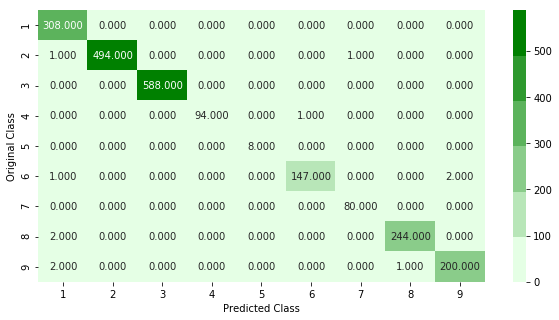

-------------------------------------------------- Precision matrix --------------------------------------------------


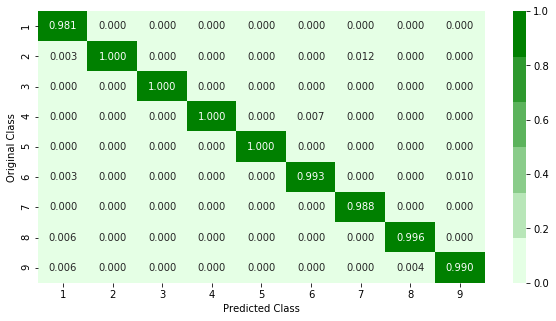

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


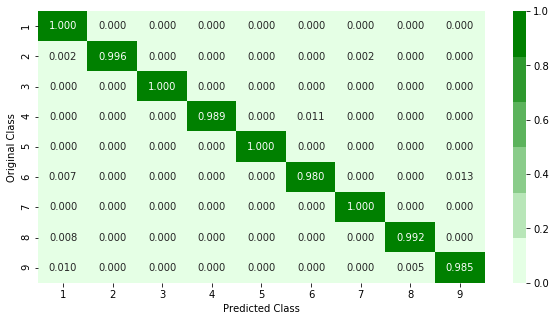

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [40]:
%matplotlib inline
plot_confusion_matrix(y_test, r_cfl.predict(X_test))

In [3]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Features","Train loss", "Test loss"]
x.add_row(["XGB", "bigram_top_500+ asm_images + asm_bigram + asm_trigram" ,0.001338,  0.01978])
print(x)

+-------+-------------------------------------------------------+------------+-----------+
| Model |                        Features                       | Train loss | Test loss |
+-------+-------------------------------------------------------+------------+-----------+
|  XGB  | bigram_top_500+ asm_images + asm_bigram + asm_trigram |  0.001338  |  0.01978  |
+-------+-------------------------------------------------------+------------+-----------+


## Summary

- In above case study, feature engineering was most tricky and challenging part.
- **BiGrams Byes Features** We used Bytes features, using some HEXA DECIMAL CODE we built 'bigrams' features.
- **Images ASM features** then we generate images using .asm files.
- **Bigrams ASM features** similarly to bytes feature we built bigram features for ASM.
- **TriGrams ASM features** then we compute trigrams also.

Then we combine all features and apply to XGBoost.

- Working with local machine with limit RAM and local disk above task is impossible. Running model is  **computation expensive**. We have worked with **GCP** cloud server.

## Reference:

- https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb
- https://github.com/sai977/microsoft-malware-detection/blob/master/MicrosoftMalwareDetection.ipynb
- https://medium.com/datadriveninvestor/what-ive-learned-microsoft-malware-prediction-competition-on-kaggle-3c8189dcc850
- https://towardsdatascience.com/malware-classification-using-machine-learning-7c648fb1da79
- https://www.youtube.com/watch?v=VLQTRlLGz5Y
- https://www.youtube.com/watch?v=KyOPzmkYq8E


**GCP**:


- https://www.youtube.com/watch?v=Db4FfhXDYS8
- https://www.youtube.com/watch?v=BPUfVq7RaY8

## Special Thanks
- Applied AI (https://www.appliedaicourse.com/)